<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [105]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [106]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [107]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [108]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


For the "Median value of owner-occupied homes" provide a boxplot

In [120]:
np.median([1,1,2,5,6])

2.0

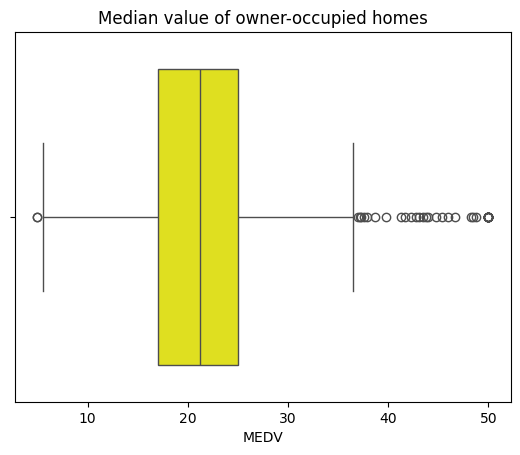

In [109]:
ax = sns.boxplot(x='MEDV', data=boston_df, color='yellow')
ax.set_title('Median value of owner-occupied homes')
plt.show()



1. Provide a  bar plot for the Charles river variable

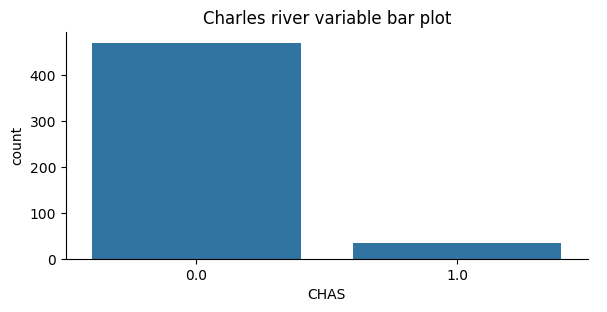

In [110]:
sns.catplot(x='CHAS',
            kind='count', data=boston_df,
            height = 3, aspect = 2)
plt.title('Charles river variable bar plot')
plt.show()


### Explanation:
This is a boxplot showing the median value of owner-occupied homes, which appears to be around 21.
the lines to the left and right represent the min and max values in the data. 

2) Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)


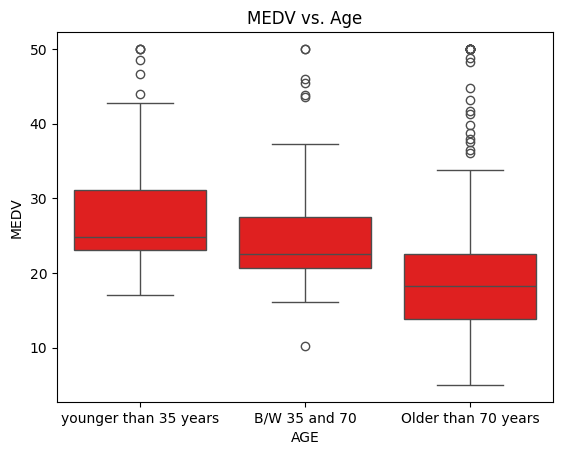

In [121]:
# import numpy as np
# age = boston_df['AGE']
# age_1 = []
# age_2 = []
# age_3 = []
# for i in age:
#     if i<35:
#         age_1.append(i)
#     elif i>=35 and i<=70:
#         age_2.append(i)
#     else:
#         age_3.append(i)
# print(age_1)

age = boston_df['AGE']
age_cut_groups = pd.cut(age, bins=[0, 35, 70, 100], labels=['younger than 35 years','B/W 35 and 70','Older than 70 years'])
# print(age_cut_groups)

import numpy as np

ax = sns.boxplot(x=age_cut_groups,y=boston_df['MEDV'],color='red')
ax.set_title('MEDV vs. Age')
plt.show()

### Explanation:
the following is a boxplot showing the relationship between the median value of owner_occupied homes and age. The age is divided into three groups: group 1 is 35 years and younger, group two with age between 35 and 70, and group three where age is older than 70. the median values for each group is displayed (line inside each red box).

3. Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?


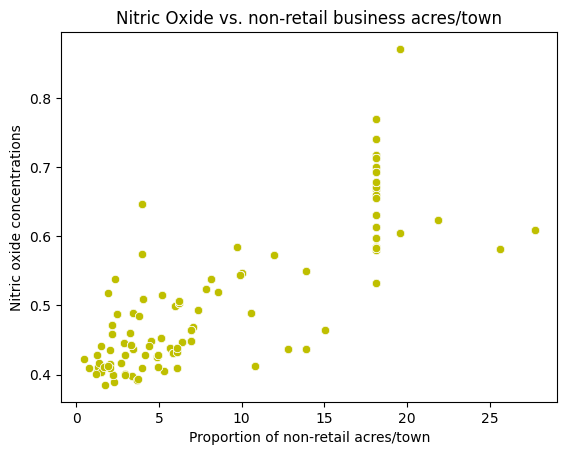

In [80]:
ax = sns.scatterplot(x='INDUS',y='NOX', data=boston_df,color='y')
plt.title('Nitric Oxide vs. non-retail business acres/town')
plt.xlabel('Proportion of non-retail acres/town')
plt.ylabel('Nitric oxide concentrations')
plt.show()

### Explanation: 
Here we do a scatter plot to show the relationship between two variables: nitric oxide concentration and proportion of non-retail acers per town. 
the way the data scatters can tells us about the type of function (linear, exp, etc.)

4. Create a histogram for the pupil to teacher ratio variable

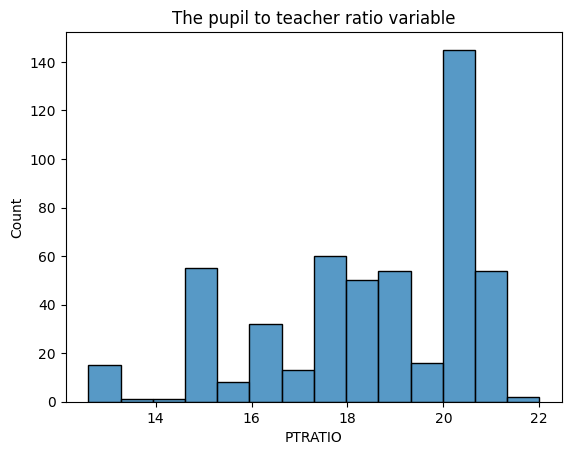

In [91]:
sns.histplot(boston_df['PTRATIO'])
plt.title('The pupil to teacher ratio variable')
plt.show()

### Explanation:
the above graph is a histogram of the pupil to teacher ratio variable. the y axis shows the count, or frequency for each bin. 

### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Hypotheses: 
1) there is no significant difference (reject null hypo.)
2) there is a significant difference (fail to reject null hypo.)
3) Depending on the value of p (p_value), that is whether it is bigger or smaller than 0.05, we can either reject or fail to reject hypo. 
4) for alpha = 0.05

In [123]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS']==1]['MEDV'],boston_df[boston_df['CHAS']==0]['MEDV'],equal_var = True)

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

#### The p_value is 7.39 x 10^-5, which is < 0.05. Therefore, there is a significant difference in the median. We reject the null hypo. 

#### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Hypotheses: 
1) there is no significant difference (reject null hypo.)
2) there is a significant difference (fail to reject null hypo.)
3) Depending on the value of p (p_value), that is whether it is bigger or smaller than 0.05, we can either reject or fail to reject hypo. 
4) for alpha = 0.05

In [117]:
age_cut_groups

from statsmodels.formula.api import ols
lm = ols('MEDV ~ age_cut_groups', data = boston_df).fit()
table= sm.stats.anova_lm(lm)
print(table)



                   df        sum_sq      mean_sq         F        PR(>F)
age_cut_groups    2.0   5401.731883  2700.865942  36.40765  1.710501e-15
Residual        503.0  37314.563532    74.184023       NaN           NaN


#### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)


In [114]:
# Hypotheses: 
# 1) there is no significant difference (reject null hypo.)
# 2) there is a significant difference (fail to reject null hypo.)
# Depending on the value of p (p_value), that is whether it is bigger or smaller than 0.05, we can either reject or fail to reject hypo. 

# for alpha = 0.05

scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])


PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

##### Since the p_value ((2-tailed) < 0.05, we reject the Null hypothesis. conclusion: there exists a relationship between Nitric oxide concentrations and non-retail business acers per town. The null hypo. is rejected. 

#### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [115]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 21 Aug 2024   Prob (F-statistic):           1.21e-08
Time:                        14:39:44   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""